In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Declaration of the required variables

In [28]:
fileName = 'data.txt' #file name
rows = []
weights = []
columns = 0
epochs = 0
learningRate = 0
trainData, testData, trainTarget, testTarget, trainFeatures, testFeatures = [], [], [], [], [], []
predictedOutput = []
errorValues = []

In [29]:
fp = open(fileName, 'r')
lines = fp.readlines()

#cast each row's values from string to float and form a list of rows
for line in lines:
    l = [float(x) for x in line.split('\t')]
    rows.append(l)

columns = len(rows[0]) - 1 #no. of features

Splitting data into test set and training set (70/30)

In [30]:
np.random.seed(0)  
np.random.shuffle(rows)   # to have the same shuffle and split every time the code is run
#70% of the data is used as train data
for i in range(int(0.7 * len(rows))):
    trainData.append(rows[i])
    trainTarget.append(int(rows[i][-1])) #the output column values of train data
    trainFeatures.append(rows[i][:-1]) #the list of feature values of train data

#remainder(30%) of the data is used as test data 
for i in range(int(0.7 * len(rows)), len(rows)):
    testData.append(rows[i])
    testTarget.append(int(rows[i][-1])) #the output column values of test data
    testFeatures.append(rows[i][:-1]) #the list of feature values of test data

Display total no. of records, train data and test data target values

In [31]:
print('No. of records: ',len(trainData) + len(testData))

No. of records:  140


In [32]:
print('trainTarget: ',  trainTarget)

trainTarget:  [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]


In [33]:
print('testTarget: ', testTarget)

testTarget:  [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]


To initialize epochs, learningRate and weights

In [34]:
epochs = 1000
learningRate = 0.01
weights.append(1.0)

for _ in range(1, columns+1):
    r = np.random.uniform(0.0, 1.0) #assigns random float values in the range 0.0 to 0.1
    weights.append(r)

print("Initial weights: ", weights[1:])

Initial weights:  [0.5528214798875715, 0.16494046024188413, 0.36980809274834003, 0.14644176272911225, 0.5696184059233067, 0.7037372792899163, 0.28847643704852866]


Training weights

In [35]:
#activation function to return a value 0 if sum<0 and 1 if sum>=0 (sigmoid function, tanh etc can also be used)
def predict(trainDataRow):
    sum = 0
    for i in range(columns):
        sum += trainDataRow[i] * weights[i+1]
    sum += weights[0]
    return 0 if sum < 0 else 1

In [36]:
for epoch in range(epochs):
    misclassified = 0
    for j in range(len(trainFeatures)):
        p = predict(trainFeatures[j])
        error = trainTarget[j] - p

        if(error):
            misclassified += 1
            
        weights[0] += learningRate * error

        for k in range(1, columns+1):
            weights[k] += learningRate * error * trainFeatures[j][k-1]
        
    errorValues.append(misclassified)

In [37]:
print("epoch: "+str(epoch)+"  updated weights: "+str(weights))

epoch: 999  updated weights: [0.13999999999999924, 3.207421479888147, -3.4480595397580394, -0.5476529072516312, -1.7260082372706895, 0.31627840592336753, -0.3740517207100016, 2.286336437048364]


In [38]:
print("\n\nNo. of epochs: ", epochs)



No. of epochs:  1000


In [39]:
print("Learning rate: ", learningRate)

Learning rate:  0.01


In [40]:
print("Learnt weights: ", weights[1:])

Learnt weights:  [3.207421479888147, -3.4480595397580394, -0.5476529072516312, -1.7260082372706895, 0.31627840592336753, -0.3740517207100016, 2.286336437048364]


Plot showing error(misclassified) vs epochs

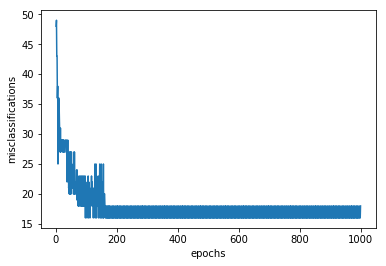

In [41]:
plt.plot(np.arange(1, epochs+1), errorValues)
plt.xlabel('epochs')
plt.ylabel('misclassifications')
plt.show()

Accuracy of model on training data

In [42]:
scores = []
for i in range(len(trainFeatures)):
    correct = 0
    if trainTarget[i] == predict(trainFeatures[i]):
        correct += 1
    scores.append(correct / float(len(trainTarget)) * 100.0)
print('Accuracy on training data:', (sum(scores) / float(len(scores))) * 100, '%')

Accuracy on training data: 90.58725531028733 %


Testing the perceptron using test data features

In [43]:
print('Actual target values - Predicted target values')
for i in range(len(testFeatures)):
    predictedOutput.append(predict(testFeatures[i]))
    print('     ',testTarget[i],'   -   ',predictedOutput[i])

Actual target values - Predicted target values
      0    -    1
      1    -    1
      0    -    0
      0    -    0
      1    -    1
      0    -    0
      1    -    1
      0    -    0
      0    -    0
      0    -    0
      1    -    1
      1    -    1
      1    -    1
      0    -    0
      1    -    1
      1    -    1
      0    -    0
      1    -    1
      1    -    1
      1    -    1
      0    -    0
      1    -    1
      1    -    1
      1    -    1
      0    -    1
      0    -    1
      1    -    1
      1    -    1
      0    -    1
      1    -    1
      0    -    0
      0    -    1
      1    -    1
      1    -    1
      1    -    1
      0    -    1
      0    -    0
      1    -    1
      1    -    1
      0    -    0
      1    -    1
      0    -    0


Calculating accuracy metrics

In [44]:
TP, TN, FP, FN = 0, 0, 0, 0 #true positive, true negative, false positive, false negative(accuracy metrics)
    
for i in range(len(testData)):
    if testTarget[i] == predictedOutput[i] and predictedOutput[i] == 1:
        TP += 1
    elif testTarget[i] == predictedOutput[i] and predictedOutput[i] == 0:
        TN += 1
    elif testTarget[i] != predictedOutput[i] and predictedOutput[i] == 1:
        FP += 1
    else:
        FN += 1

In [45]:
TP

23

In [46]:
TN

13

In [47]:
FP

6

In [48]:
FN

0

In [49]:
confusionMatrix = [[TP, FN], [FP, TN]]
print('Confusion Matrix:\n', str(confusionMatrix[0][0])+' '+str(confusionMatrix[0][1])+'\n '+str(confusionMatrix[1][0])+' '+str(confusionMatrix[1][1]))

Confusion Matrix:
 23 0
 6 13


In [50]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Accuracy: ',Accuracy)

Accuracy:  0.8571428571428571


In [51]:
Precision = TP / (TP + FP)
print('Precision: ',Precision)

Precision:  0.7931034482758621


In [52]:
Recall = TP / (TP + FN)
print('Recall: ',Recall)

Recall:  1.0


CONCLUSION

The above model has been run on seeds dataset using stochastic gradient descent. And it has been observed that the model runs with an accuracy of 90.58% on the train data and with an accuracy of 85.71% on the test data.